In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [51]:
X, y = make_regression(n_samples=100, n_features=1, noise=50, random_state=42)

dic = {'Feature': X.reshape(-1), 'Target': list(y)}
data = pd.DataFrame(dic)
data.head()

,Feature,Target
0,0.931280,98.409020
1,0.087047,-64.860112
2,-1.057711,2.008112
3,0.314247,0.165597
4,-0.479174,-8.686846


Epoch 0
Epoch 50


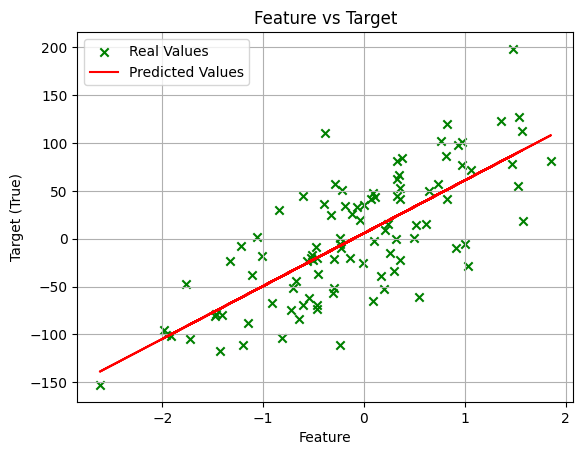

In [109]:
def loss_func(data, m, b):
    total_error = 0

    for i in range(len(data)):
        x = data.iloc[i].Feature
        y = data.iloc[i].Target

        total_error += (y - (m*x + b))**2

    return total_error/float(len(data))


def gradient_descent(m_now, b_now, data, L):
    m_gradient = 0
    b_gradient = 0

    n = len(data)

    for i in range(n):
        x = data.iloc[i].Feature
        y = data.iloc[i].Target

        m_gradient += -(2/n)*x*(y - (x*m_now + b_now))
        b_gradient += -(2/n) * (y - (x*m_now + b_now))


    m = m_now - m_gradient*L
    b = b_now - b_gradient*L

    return m, b


m = 0
b = 0
L = 0.1
epochs = 100

for i in range(epochs):

    if i%50 == 0:
        print(f'Epoch {i}')
    m, b = gradient_descent(m, b, data, L)

plt.scatter(data.Feature, data.Target, color='green', marker='x', label='Real Values')
plt.plot(data.Feature, m*(data.Feature) + b, color='red', label='Predicted Values')
plt.grid()
plt.xlabel("Feature")
plt.ylabel("Target (True)")
plt.title("Feature vs Target")
plt.legend()
plt.show()